MAI 103: Análise de Risco  //  Prof. Eber  
Lista 03  //  Data: 26/06/2018  //  Entrega: 03/07/2018


<b>Luis Filipe Kopp</b>  
<b>Mauro Bastos</b>  
<b>Brenda Santos</b>  
<b>Ronilson Pinho</b>  


Faça um modelo de risco (em R) para o custo de um projeto de um gasoduto. A opção preferida para a rota do gasoduto tem uma extensão de 260 km. Existe um risco, porém, de que devido a oposição local, uma rota alternativa com 290 km tenha que ser utilizada. Estima-se que a chance que isto aconteça está na faixa entre 35% a 40%. A tubulação para o gasoduto vem em seções de 8m de comprimento. As estimativas de custo (em USD ) são mostradas na tabela abaixo.

item | unid | min | Mprov | Max 
:------|:----|:----:|:------:|:-------:
Tubulação | dolar por 8m | 725 | 740 | 790
Tempo pra cavar vala | hh por 8m|12|16|25
Custo de mão-de-obra|dolar por hora|17|18.5|23
Transporte da tubulação|dolar por 8m|6.1|6.6|7.4
Tempo de soldagem dos tubos|hh por junção|4|4.5|5
Custo do sistema de filtragem|unid.|165000|173000|188000
Custo de acabamento|dolar por km|14000|15000|17000

## 1) as funções de probabilidade e suas cumulativas para o custo total em função da percepção de incerteza da rota alternativa

a função de probabilidade é a custo_(prob), e a acumulada é ecdf(custo_(prob)).  
Aplicando em .35, .40 ou de .35 a .4 de .01 em .01 apresenta comportamento muito similar, como apresentado no gráfico 2.  
No entanto, a ocorrência da rota alternativa só pode ser sim ou não.  

In [13]:
library(triangle)
set.seed(1)

In [14]:
custo_ <- function(prob = .35, ns = 10000) {
    distancia <-  (rep(260,ns) + rbinom(ns,1,prob) * 30) * 1000 #### em metros
    n_tubos <- ceiling(distancia / 8)
    tub <-    rtriangle(ns,725,790,740) * n_tubos ### dolar
    cavar <-  rtriangle(ns,12,25,16) * n_tubos   ### horas
    mdo <-    rtriangle(ns,17,23,18.5)  ### dolar/hora
    transp <- rtriangle(ns,6.1,7.4,6.6) * n_tubos ### dolar 
    sold <-   rtriangle(ns,4,5,4.5) * (n_tubos -1) ### horas
    filtr <-  rtriangle(ns,165000,188000,173000) ### dolar
    acab <-   rtriangle(ns,14000,17000,15000) * distancia/1000 ### dolar
    c <- (tub + cavar * mdo + transp + sold* mdo + filtr + acab) / 1000000
}

In [15]:
cc <- c()
for (p in  seq(.35, .40, .01) ){
    cc <- c(cc,custo_(p,10000))
}

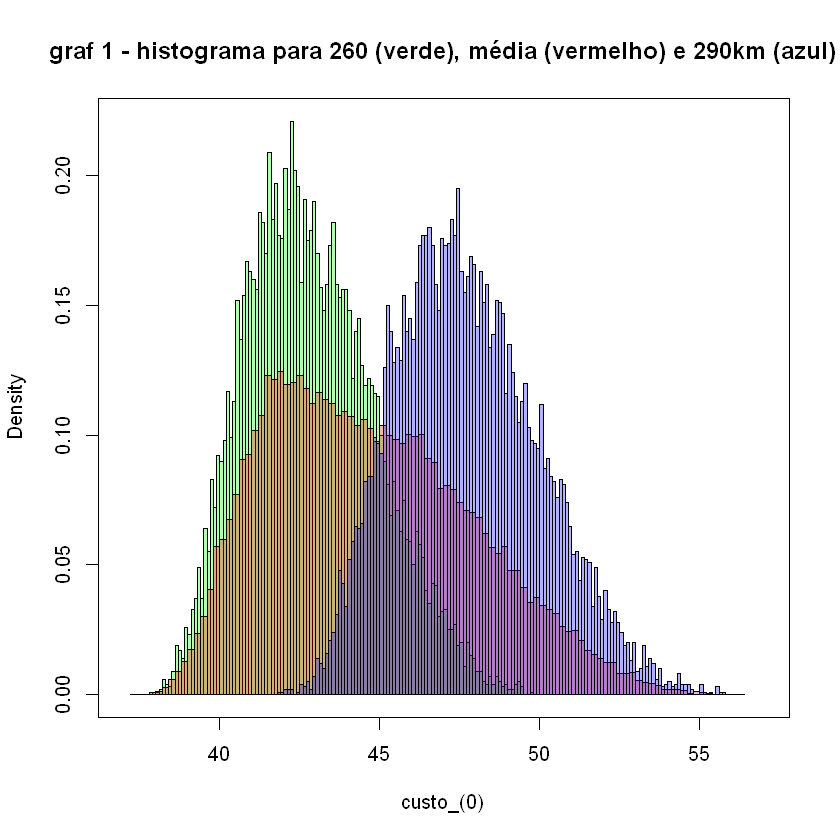

In [16]:
hist(custo_(0), col=rgb(0,1,0,.3),breaks =100, xlim=c(37,57), probability = T, 
     main="graf 1 - histograma para 260 (verde), média (vermelho) e 290km (azul)")   ### green
hist(cc, col=rgb(1,0,0,.3),breaks =100, xlim=c(37,57), probability = T, add=T)   ### red
hist(custo_(1), col=rgb(0,0,1,.3),breaks =100, xlim=c(37,57), probability = T, add=T)  ### blue
box()

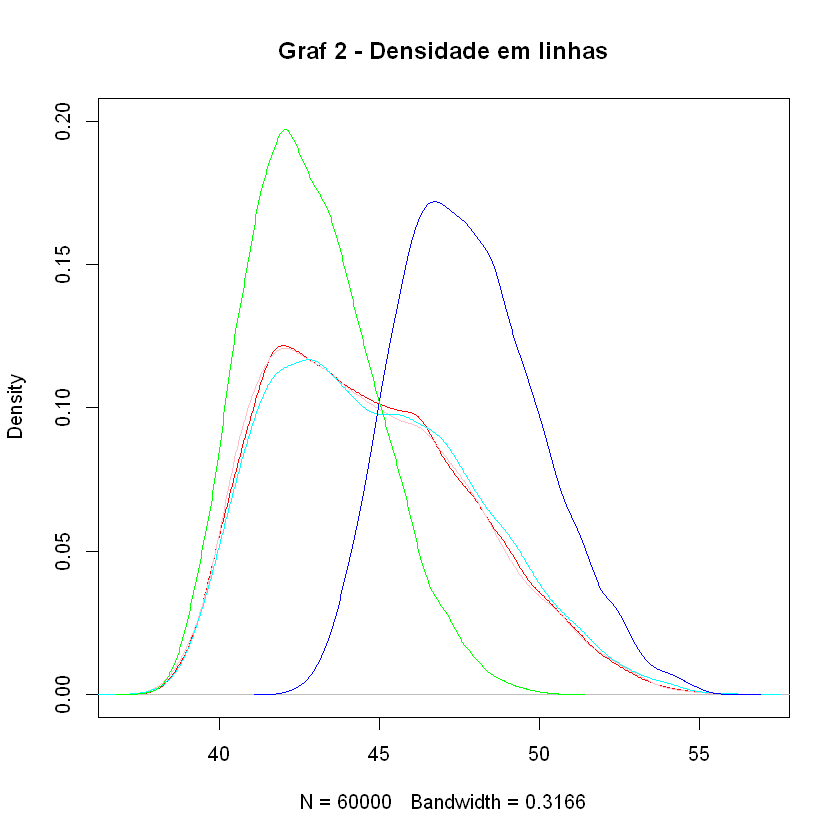

In [17]:
plot(density(cc), xlim = c(37,57), ylim = c(0,.2), col="red", 
     main="Graf 2 - Densidade em linhas")
lines(density(custo_(.35)), col="pink")
lines(density(custo_(.4)), col="cyan")
lines(density(custo_(1)), col="blue")
lines(density(custo_(0)), col="green")


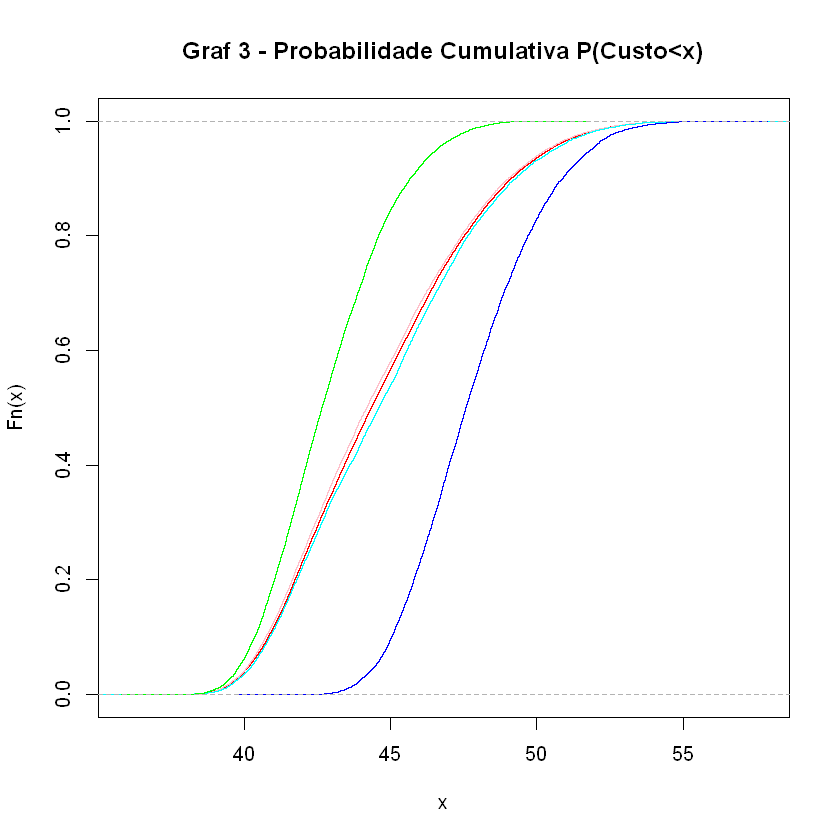

In [18]:
plot(ecdf(cc), main="Graf 3 - Probabilidade Cumulativa P(Custo<x)", col="red")
plot(ecdf(custo_(.35)), add=T, col="pink")
plot(ecdf(custo_(.4)), add=T, col="cyan")
plot(ecdf(custo_(0)), add=T, col="green")
plot(ecdf(custo_(1)), add=T, col="blue")

### 2) assumindo que vc é o proponente: qual seria o preço proposto, o alvo de custo e o valor contingenciado da obra?

o preço proposto depende de:  
1) margem de lucro média praticada no setor  
2) o retorno depende do risco tomado, e a percepção de risco depende do lugar e do risco já tomado na carteira da empresa.  
Como essas informações não estão disponíveis, fizemos apenas a análise de custo: 42.3 milhões de dólares  

In [19]:
inv_ecdf <- function(f){ 
        x <- environment(f)$x 
        y <- environment(f)$y 
        approxfun(y, x) 
} 

com260 <- inv_ecdf(ecdf(custo_(0)))(.85)
print(c("melhor caso (260km)",com260))

com290 <- inv_ecdf(ecdf(custo_(1)))(.85)
print(c("pior caso (290km)",com290))

provavel <- inv_ecdf(ecdf(cc))(.85)
print(c("ALVO e PROPOSTA - custo esperado considerando risco 35-40%",
        provavel))

print(c("CONTINGÊNCIA - alvo até pior caso",com290 - provavel))



[1] "melhor caso (260km)" "44.9984911317617"   
[1] "pior caso (290km)" "50.2485214659762" 
[1] "ALVO e PROPOSTA - custo esperado considerando risco 35-40%"
[2] "48.2269067060299"                                          
[1] "CONTINGÊNCIA - alvo até pior caso" "2.02161475994635"                 


In [20]:
### outra forma de calcular a reserva de contingência é ver diferença 
#entre pior e melhor caso e multiplicar pelo risco

reserva <- (com290 - com260) * .375
print(c("CONTINGÊNCIA",reserva))


[1] "CONTINGÊNCIA"     "1.96876137533043"


### 3) assumindo que vc é o contratante: aceitaria uma proposta de USD $45 M?

Não, há 43.25% de chance de o projeto ter um custo maior que USD 45M.  

Uma empresa que oferece o serviço por 45M não dimensionou  ou não previu o risco da rota alternativa. Já que se houver a rota alternativa teria 90% de chance do custo ser maior que 45 milhões de dólares

In [21]:
print(c("chance de custo maior que 45M na média", 1 - ecdf(cc)(45)))
print(c("chance de pior caso maior que 45M",1 - ecdf(custo_(1))(45)))

[1] "chance de custo maior que 45M na média"
[2] "0.43255"                               
[1] "chance de pior caso maior que 45M" "0.9006"                           


In [22]:
print(c("chance na média do risco para custo maior que ",
        round(provavel,2), round(1 - ecdf(cc)(provavel),4)))
print(c("chance de pior caso maior que ",round(provavel,2),
        round(1 - ecdf(custo_(1))(provavel),3)))

[1] "chance na média do risco para custo maior que "
[2] "48.23"                                         
[3] "0.15"                                          
[1] "chance de pior caso maior que " "48.23"                         
[3] "0.395"                         
